In [8]:
import pandas as pd

file_path = 'C:/Users/Anush Bhandary/Desktop/pregwoman (1).csv'
data = pd.read_csv(file_path)

data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,3,133,65,32,0,34.8,0.687,32,1
1,5,148,76,28,0,23.4,0.346,35,0
2,0,183,55,0,0,24.3,0.668,21,1
3,3,171,63,22,67,29.3,0.176,58,0
4,4,93,43,34,159,44.2,2.345,46,1


In [10]:
# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

columns_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for column in columns_with_zero:
    data[column] = data[column].replace(0, pd.NA)

for column in columns_with_zero:
    median_value = data[column].median()
    data[column] = data[column].fillna(median_value)
    data[column] = data[column].astype(float) 

X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\Anush Bhandary\AppData\Local\Temp\ipykernel_24188\1196156712.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[column] = data[column].fillna(median_value)
C:\Users\Anush Bhandary\AppData\Local\Temp\ipykernel_24188\1196156712.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[column] = data[column].fillna(median_value)
C:\Users\Anush Bhandary\AppData\Local\Temp\ipykernel_24188\1196156712.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.in

Linear Regression Accuracy: 0.7077922077922078
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.92      0.80        99
           1       0.69      0.33      0.44        55

    accuracy                           0.71       154
   macro avg       0.70      0.62      0.62       154
weighted avg       0.70      0.71      0.67       154



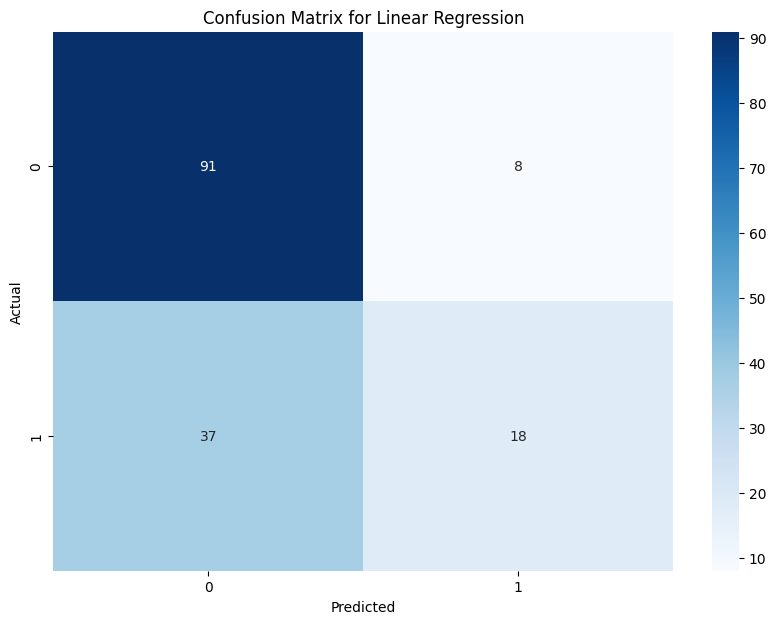

In [12]:
# Linear Regression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)

y_pred = linear_reg.predict(X_test_scaled)
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred] 
accuracy = accuracy_score(y_test, y_pred_binary)
print(f'Linear Regression Accuracy: {accuracy}')

report = classification_report(y_test, y_pred_binary)
print('Classification Report:\n', report)

conf_matrix = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Linear Regression')
plt.show()

Logistic Regression Accuracy: 0.7077922077922078
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.91      0.80        99
           1       0.68      0.35      0.46        55

    accuracy                           0.71       154
   macro avg       0.70      0.63      0.63       154
weighted avg       0.70      0.71      0.68       154



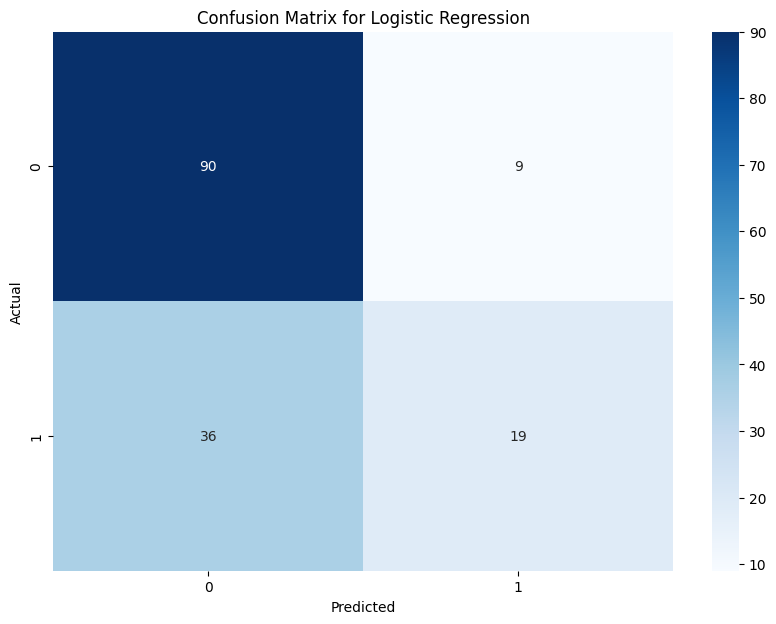

In [14]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logistic_reg = LogisticRegression(max_iter=1000)
logistic_reg.fit(X_train_scaled, y_train)

y_pred = logistic_reg.predict(X_test_scaled)
accuracy_log = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy}')

report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

SVM Accuracy: 0.7077922077922078
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.89      0.81        99
           1       0.70      0.47      0.57        55

    accuracy                           0.74       154
   macro avg       0.73      0.68      0.69       154
weighted avg       0.73      0.74      0.73       154



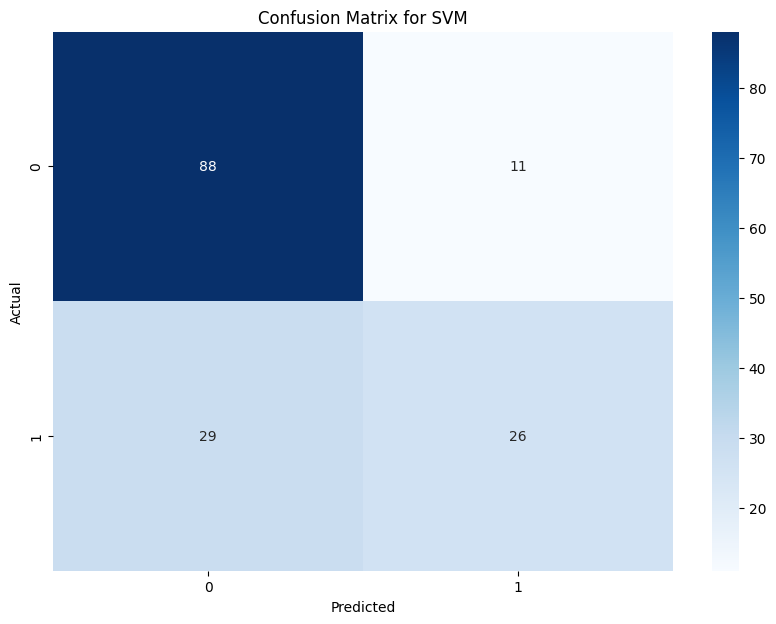

In [16]:
# Support Vector Machine
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred)
print(f'SVM Accuracy: {accuracy}')

report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()

Decision Tree Accuracy: 0.7077922077922078
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.69      0.69        99
           1       0.45      0.45      0.45        55

    accuracy                           0.60       154
   macro avg       0.57      0.57      0.57       154
weighted avg       0.61      0.60      0.60       154



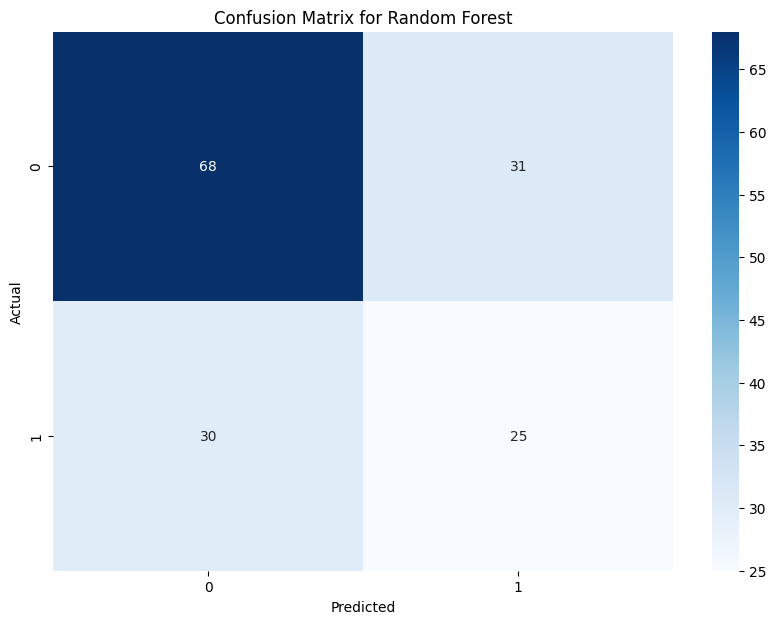

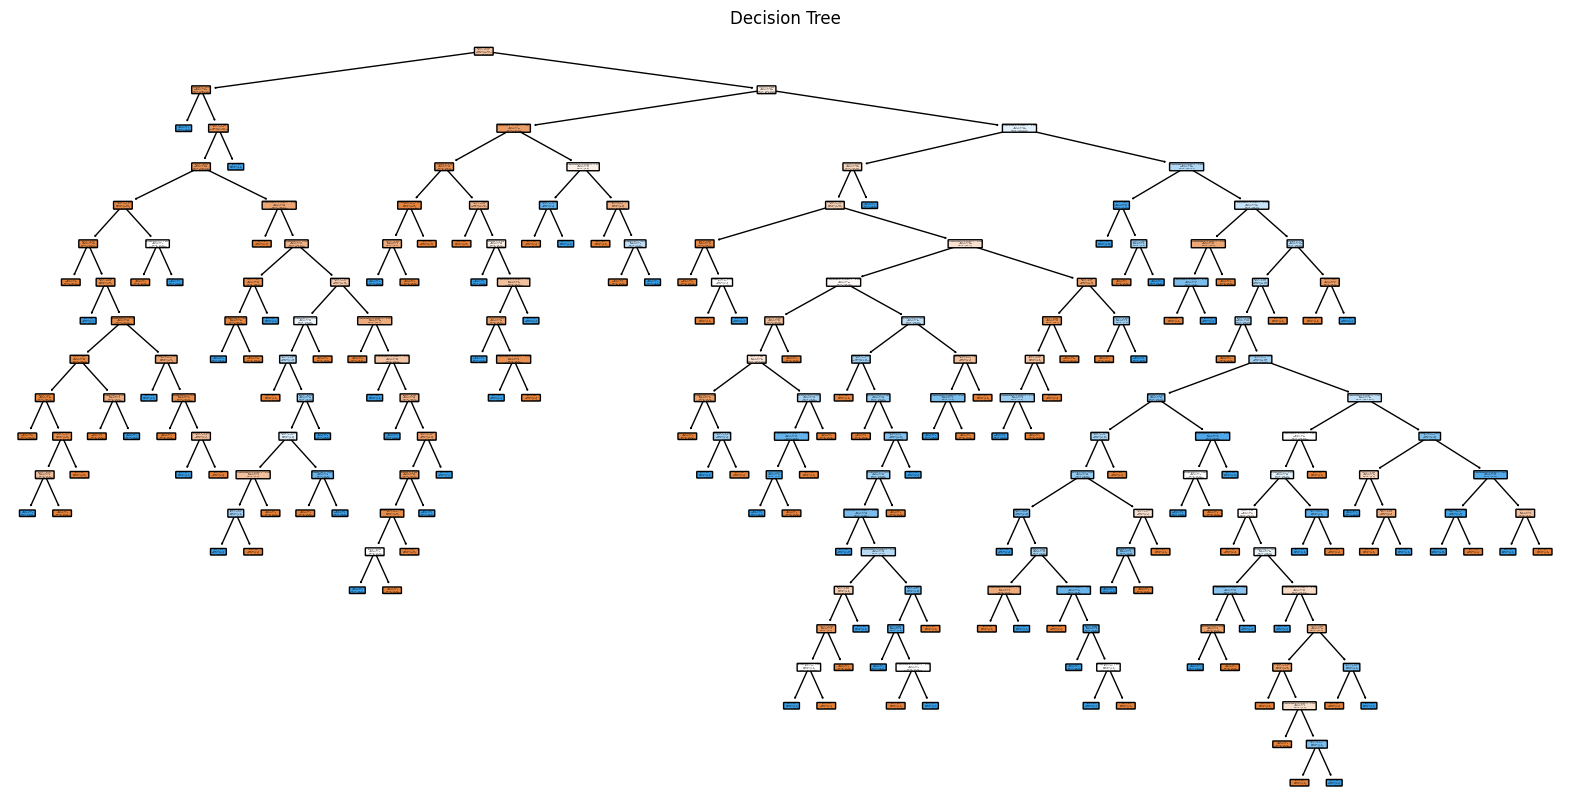

In [18]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train)

y_pred = decision_tree.predict(X_test_scaled)
accuracy_dt = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy}')

report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], rounded=True)
plt.title('Decision Tree')
plt.show()

Random Forest Accuracy: 0.7077922077922078
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.76      0.75        99
           1       0.54      0.51      0.52        55

    accuracy                           0.67       154
   macro avg       0.64      0.63      0.63       154
weighted avg       0.66      0.67      0.67       154



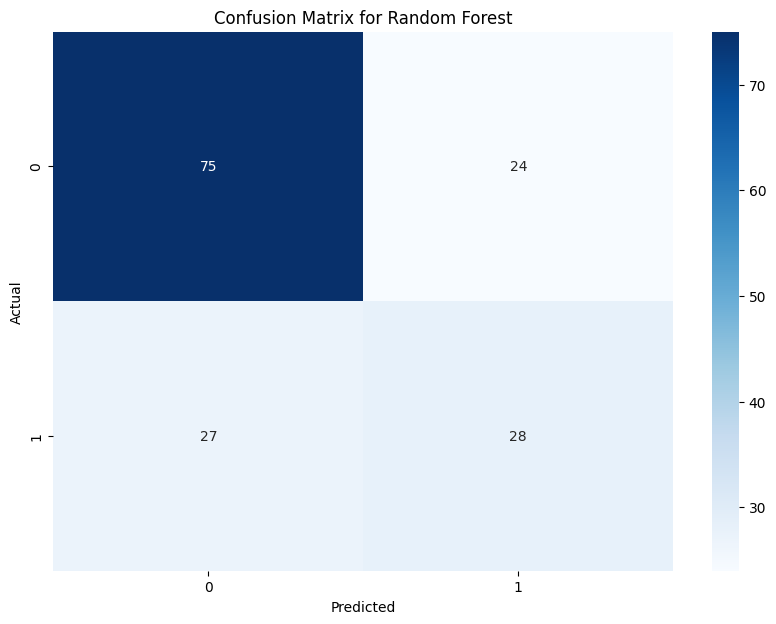

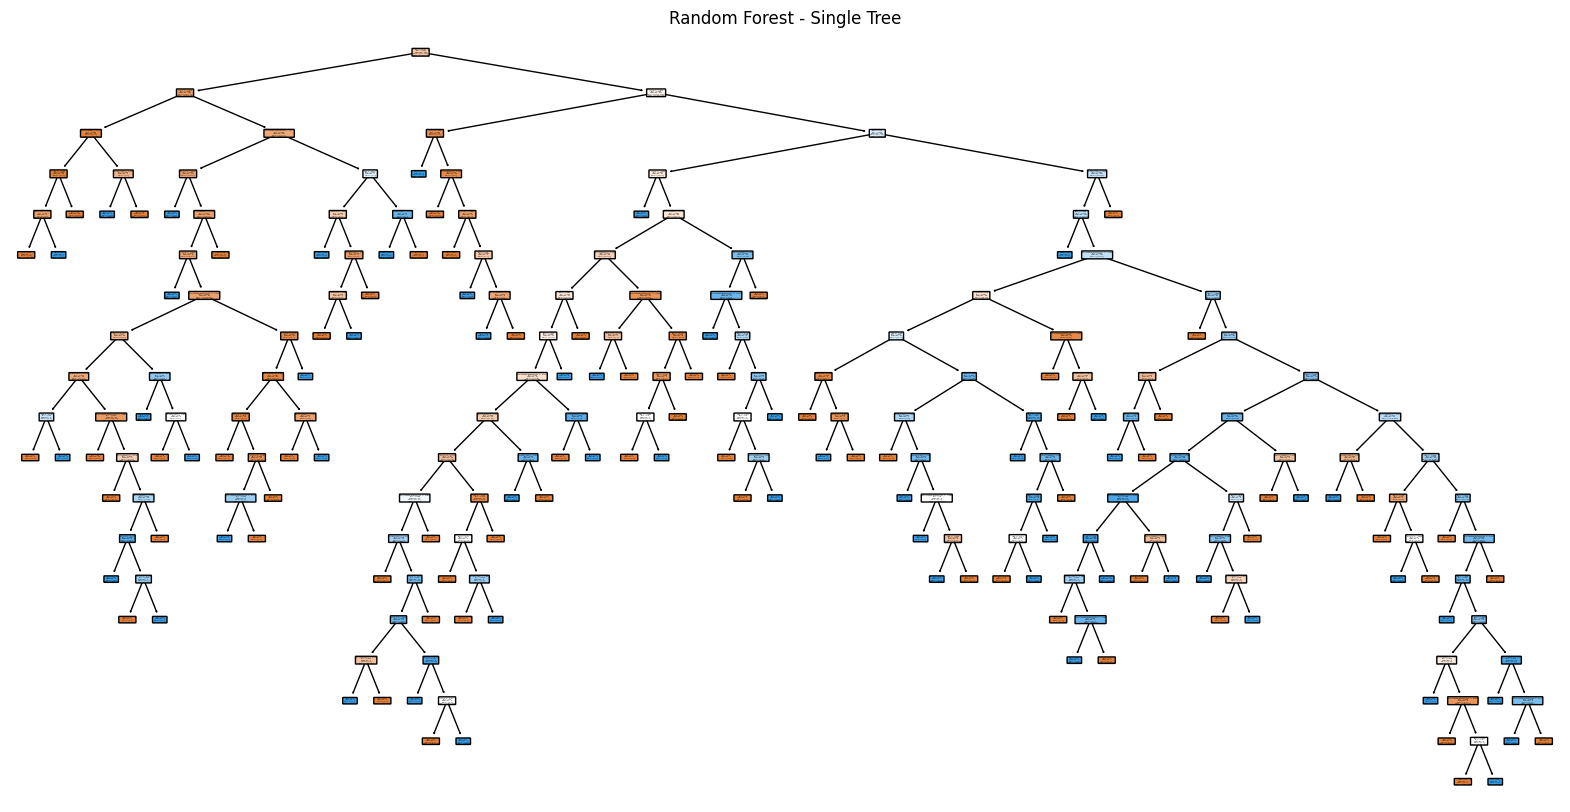

In [20]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_scaled, y_train)

y_pred = random_forest.predict(X_test_scaled)
accuracy_rf = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy}')

report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

plt.figure(figsize=(20, 10))
plot_tree(random_forest.estimators_[0], filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], rounded=True)
plt.title('Random Forest - Single Tree')
plt.show()

Naive Bayes Accuracy: 0.7077922077922078
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.87      0.80        99
           1       0.65      0.44      0.52        55

    accuracy                           0.71       154
   macro avg       0.69      0.65      0.66       154
weighted avg       0.70      0.71      0.70       154



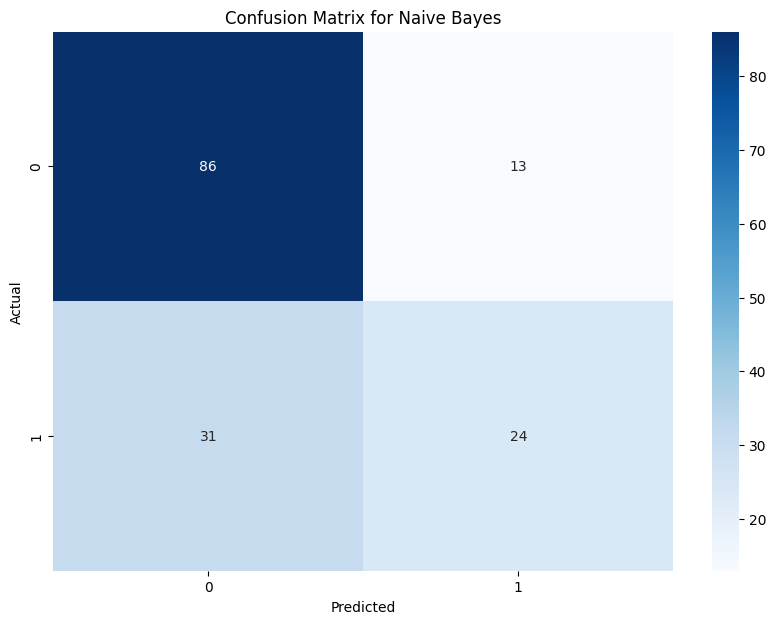

In [22]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_train_scaled, y_train)

y_pred = naive_bayes.predict(X_test_scaled)
accuracy_nb = accuracy_score(y_test, y_pred)
print(f'Naive Bayes Accuracy: {accuracy}')

report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Naive Bayes')
plt.show()

KNN Accuracy: 0.7077922077922078
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.72      0.71        99
           1       0.46      0.44      0.45        55

    accuracy                           0.62       154
   macro avg       0.58      0.58      0.58       154
weighted avg       0.61      0.62      0.61       154



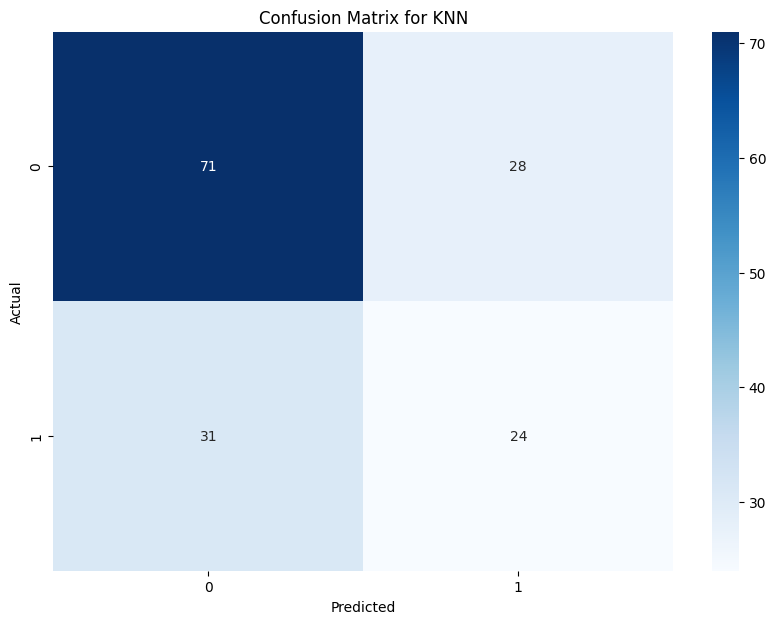

In [24]:
# K- Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred)
print(f'KNN Accuracy: {accuracy}')

report = classification_report(y_test, y_pred)
print('Classification Report:\n', report)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for KNN')
plt.show()

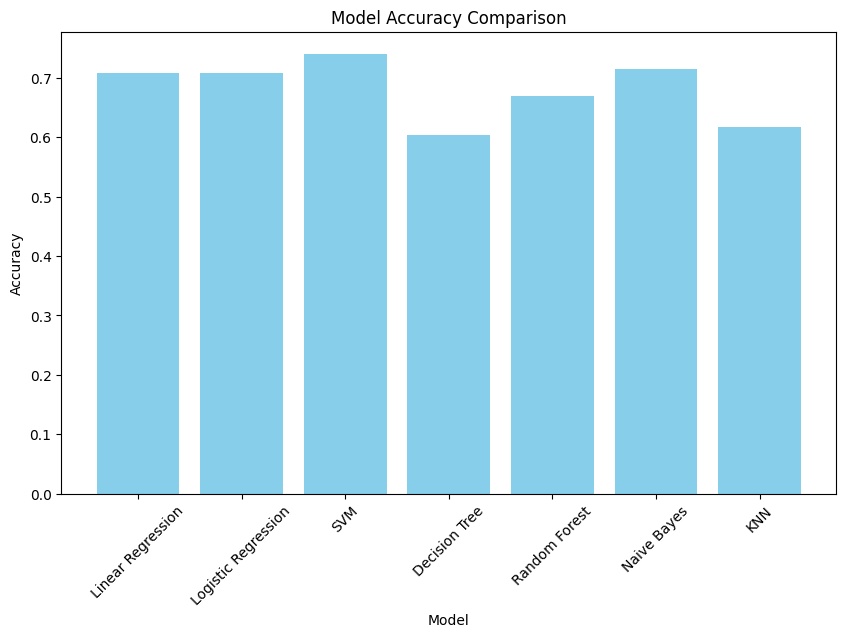

In [26]:
# Comparing the accuracy of the models
import matplotlib.pyplot as plt
import seaborn as sns

accuracy_scores = {
    'Linear Regression':accuracy,
    'Logistic Regression': accuracy_log,
    'SVM': accuracy_svm,
    'Decision Tree': accuracy_dt,
    'Random Forest': accuracy_rf,
    'Naive Bayes': accuracy_nb,
    'KNN': accuracy_knn
}

plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()